## Dragon Real Estates - Price Predictor


In [1]:
import pandas as pd
df=pd.read_csv("data.csv")
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
1,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
2,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
3,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
4,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7


In [2]:
df['CHAS'].value_counts()

CHAS
0    470
1     35
Name: count, dtype: int64

In [3]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,505.000000,505.000000,505.000000,505.000000,505.000000,500.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000
mean,3.620422,11.386139,11.125584,0.069307,0.554453,6.282738,68.530099,3.802703,9.568317,408.443564,18.444158,356.601208,12.667782,22.553109
std,8.608673,23.340080,6.869353,0.254227,0.116049,0.705081,28.160101,2.106717,8.705715,168.651506,2.161324,91.370677,7.141386,9.194075
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.081990,0.000000,5.190000,0.000000,0.449000,5.883000,45.000000,2.100000,4.000000,279.000000,17.400000,375.330000,7.010000,17.100000
50%,0.259150,0.000000,9.690000,0.000000,0.538000,6.208500,77.300000,3.215700,5.000000,330.000000,19.000000,391.430000,11.380000,21.200000
75%,3.678220,12.500000,18.100000,0.000000,0.624000,6.618250,94.100000,5.211900,24.000000,666.000000,20.200000,396.230000,16.960000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


## its for only learing a different method of spliting..
import numpy as np
def split_train_test(data, test_ratio):
    np.random.seed(42) # It is used to fixed the same value in random number generation
    suffled=np.random.permutation(len(data))
    test_set_size=int(len(data)*test_ratio)
    test_indices=suffled[:test_set_size]
    train_indices=suffled[test_set_size:]
    return data.iloc[train_indices],data.iloc[test_indices]

In [4]:
#train_set,test_set=split_train_test(df,0.2)

In [5]:
#print(f"Rows in train set:{len(train_set)}\n Rows in test set: {len(test_set)}\n")

In [6]:
from sklearn.model_selection import train_test_split
train_set,test_set=train_test_split(df,test_size=0.2,random_state=42)
print(f"Rows in train set:{len(train_set)}\n Rows in test set: {len(test_set)}\n")


Rows in train set:404
 Rows in test set: 101



In [7]:
test_set['CHAS'].value_counts()

CHAS
0    94
1     7
Name: count, dtype: int64

In [8]:
df=train_set.copy()

In [9]:
test_set.info()

<class 'pandas.core.frame.DataFrame'>
Index: 101 entries, 173 to 86
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     101 non-null    float64
 1   ZN       101 non-null    float64
 2   INDUS    101 non-null    float64
 3   CHAS     101 non-null    int64  
 4   NOX      101 non-null    float64
 5   RM       101 non-null    float64
 6   AGE      101 non-null    float64
 7   DIS      101 non-null    float64
 8   RAD      101 non-null    int64  
 9   TAX      101 non-null    int64  
 10  PTRATIO  101 non-null    float64
 11  B        101 non-null    float64
 12  LSTAT    101 non-null    float64
 13  MEDV     101 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 11.8 KB


 ## Looking for correletion

In [10]:
corr_matrix=df.corr()

In [11]:
corr_matrix['MEDV'].sort_values(ascending=False)

MEDV       1.000000
RM         0.707904
B          0.357558
ZN         0.311802
DIS        0.209112
CHAS       0.190813
AGE       -0.332112
RAD       -0.382957
CRIM      -0.384997
NOX       -0.405806
TAX       -0.456149
INDUS     -0.462293
PTRATIO   -0.494536
LSTAT     -0.742684
Name: MEDV, dtype: float64

In [12]:
#from pandas.plotting import scatter_matrix
#attributes=['MEDV','RM','ZN','LSTAT']
#scatter_matrix(df[attributes],figsize=(12,8))

<Axes: xlabel='RM', ylabel='MEDV'>

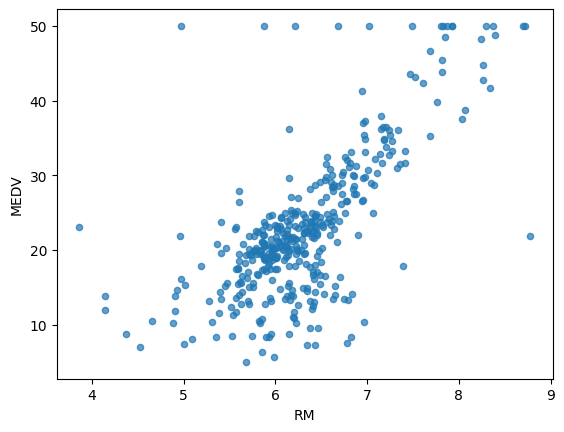

In [13]:
df.plot(kind="scatter",x="RM",y="MEDV",alpha=0.7)

## Trying Out Attribute Combination

In [14]:
df['TAXRM']=df['TAX']/df['RM']

In [15]:
df['TAXRM']

75      63.385889
442    102.698535
15      51.727043
325     45.468948
388    123.562152
          ...    
106     62.673413
270     35.737179
348     48.277850
435    103.080019
102     62.571289
Name: TAXRM, Length: 404, dtype: float64

In [16]:
corr_matrix=df.corr()
corr_matrix['MEDV'].sort_values(ascending=False)

MEDV       1.000000
RM         0.707904
B          0.357558
ZN         0.311802
DIS        0.209112
CHAS       0.190813
AGE       -0.332112
RAD       -0.382957
CRIM      -0.384997
NOX       -0.405806
TAX       -0.456149
INDUS     -0.462293
PTRATIO   -0.494536
TAXRM     -0.541040
LSTAT     -0.742684
Name: MEDV, dtype: float64

In [17]:
df=train_set.drop('MEDV',axis=1)
df_labels=train_set['MEDV'].copy()

## MISSING ATTRIBUTES

In [18]:
# To take care of missing Attributes, You have three options...
# 1. Get rid of missing data points.
# 2. Get rid of the whole attribute.
# 3. set the value to some value(0,mean or median).

In [19]:
# Option-1
a=df.dropna(subset=['RM'])
a.shape
# Note the the original df dataframe is remain unchanged until we apply (inplace=true).

(399, 13)

In [20]:
# Option-2
df.drop('RM',axis=1).shape
# Note that there is no RM column and also, Note the the original df dataframe is remain unchanged 

(404, 12)

In [21]:
# Option-3
# we put the median in the missing values, first we find the median of a column
median=df['RM'].median()
median

6.212

In [22]:
# Enter the median value in missing values.
df['RM'].fillna(median)
# Note the the original df dataframe is remain unchanged until we apply (inplace=true).

75     6.279
442    6.485
15     5.935
325    6.312
388    5.390
       ...  
106    6.127
270    6.240
348    6.939
435    6.461
102    6.137
Name: RM, Length: 404, dtype: float64

In [23]:
df.shape

(404, 13)

In [24]:
df.describe() # before we started filling missing attributes

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,404.000000,404.000000,404.000000,404.000000,404.000000,399.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.783410,11.618812,11.124183,0.069307,0.558549,6.311256,68.303218,3.797236,9.702970,410.202970,18.323762,354.835470,12.576114
std,9.092211,23.400934,6.921598,0.254290,0.118825,0.719643,28.285571,2.148429,8.707596,168.139309,2.224548,92.173066,7.124440
min,0.009060,0.000000,0.460000,0.000000,0.385000,3.863000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082598,0.000000,5.130000,0.000000,0.452000,5.885500,43.200000,2.064700,4.000000,281.000000,16.800000,372.787500,6.892500
50%,0.298675,0.000000,8.560000,0.000000,0.538000,6.212000,77.750000,3.107300,5.000000,336.000000,18.750000,390.925000,11.395000
75%,3.694070,20.000000,18.100000,0.000000,0.647000,6.635000,93.800000,5.255350,24.000000,666.000000,20.200000,395.945000,16.672500
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


In [25]:
# we do above work using sklearn library, we will fill the missing values in any attribute by median using Imputer..
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(strategy='median')
imputer.fit(df)

SimpleImputer(strategy='median')

In [26]:
imputer.statistics_

array([2.98675e-01, 0.00000e+00, 8.56000e+00, 0.00000e+00, 5.38000e-01,
       6.21200e+00, 7.77500e+01, 3.10730e+00, 5.00000e+00, 3.36000e+02,
       1.87500e+01, 3.90925e+02, 1.13950e+01])

In [27]:
X=imputer.transform(df)

In [28]:
# we make tranform DataFrame here (df_tr)
df_tr=pd.DataFrame(X,columns=df.columns)

In [29]:
df_tr.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.783410,11.618812,11.124183,0.069307,0.558549,6.310027,68.303218,3.797236,9.702970,410.202970,18.323762,354.835470,12.576114
std,9.092211,23.400934,6.921598,0.254290,0.118825,0.715249,28.285571,2.148429,8.707596,168.139309,2.224548,92.173066,7.124440
min,0.009060,0.000000,0.460000,0.000000,0.385000,3.863000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082598,0.000000,5.130000,0.000000,0.452000,5.887750,43.200000,2.064700,4.000000,281.000000,16.800000,372.787500,6.892500
50%,0.298675,0.000000,8.560000,0.000000,0.538000,6.212000,77.750000,3.107300,5.000000,336.000000,18.750000,390.925000,11.395000
75%,3.694070,20.000000,18.100000,0.000000,0.647000,6.632000,93.800000,5.255350,24.000000,666.000000,20.200000,395.945000,16.672500
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


## Scikit-learn Design

Primarily, three types of objects
1. Estimators - It estimates some parameter based on a dataset. Eg. imputer. It has a fit method and transform method. Fit method - Fits the dataset and calculates internal parameters

2. Transformers - transform method takes input and returns output based on the learnings from fit(). It also has a convenience function called fit_transform() which fits and then transforms.

3. Predictors - LinearRegression model is an example of predictor. fit() and predict() are two common functions. It also gives score() function which will evaluate the predictions.

## Features Scaling

Primarily, two types of feature scaling methods:
1. Min-max scaling (Normalization)
    (value - min)/(max - min)
    Sklearn provides a class called MinMaxScaler for this
    
2. Standardization
    (value - mean)/std
    Sklearn provides a class called StandardScaler for this


## Creating Pipeline

In [30]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
my_pipeline=Pipeline([
    ('imputer',SimpleImputer(strategy='median')),
    # ..... Add as many as you want in your pipeline
    ('std_scaler',StandardScaler()),
])


In [31]:
df_num_tr=my_pipeline.fit_transform(df)

In [32]:
df_num_tr.shape

(404, 13)

## Selecting a disired Model for Dragon Real Estates

In [33]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
lin_model=LinearRegression()
#tree_model=DecisionTreeRegressor()
lin_model.fit(df_num_tr,df_labels)
#tree_model.fit(df_num_tr,df_labels)

LinearRegression()

In [34]:
some_data=df.iloc[:5]
some_labels=df_labels.iloc[:5]

In [35]:
prepared_data=my_pipeline.transform(some_data)

In [36]:
lin_model.predict(prepared_data)

array([23.37048886, 18.5371175 , 20.68756568, 23.93387813, 14.28513332])

In [37]:
#tree_model.predict(prepared_data)

In [38]:
list(some_labels)

[20.0, 15.4, 23.1, 23.0, 11.5]

In [39]:
import numpy as np
from sklearn.metrics import mean_squared_error

# Model-1: this mean_squared_error for linear_regression_model
df_prediction=lin_model.predict(df_num_tr)
lin_mse=mean_squared_error(df_labels,df_prediction)
lin_rmse= np.sqrt(lin_mse)

# Model-2: this mean_squared_error for Decision_tree_model
#df_prediction=tree_model.predict(df_num_tr)
#tree_mse=mean_squared_error(df_labels,df_prediction)
#tree_rmse= np.sqrt(tree_mse)

In [40]:
lin_rmse

4.727045128837661

In [41]:
#tree_rmse

## Using better Evalution technique- Cross validation

In [42]:
from sklearn.model_selection import cross_val_score
# for linear_model
score1=cross_val_score(lin_model,df_num_tr,df_labels,scoring='neg_mean_squared_error',cv=10)
rmse_score1=np.sqrt(-score1)

# for decison_tree_model
#score2=cross_val_score(tree_model,df_num_tr,df_labels,scoring='neg_mean_squared_error',cv=10)
#rmse_score2=np.sqrt(-score2)

In [43]:
rmse_score1


array([4.44303015, 3.62571345, 4.55286993, 7.30323716, 4.52994453,
       6.01740281, 4.62833844, 3.99510839, 4.91843119, 4.73660576])

In [44]:
#rmse_score2

In [45]:
def print_score1(score1):
    print('scores',score1)
    print('mean',score1.mean())
    print('standard deviation',score1.std())

#def print_score2(score2):
    #print('scores',score2)
    #print('mean',score2.mean())
    #print('standard deviation',score2.std())
    

In [46]:
print_score1(rmse_score1)

scores [4.44303015 3.62571345 4.55286993 7.30323716 4.52994453 6.01740281
 4.62833844 3.99510839 4.91843119 4.73660576]
mean 4.875068182918335
standard deviation 1.001381852425713


In [47]:
#print_score2(rmse_score2)

## Saving the Model

In [49]:
# joblib is used to save the model
from joblib import dump,load
dump(lin_model,'Dragon.joblib')

['Dragon.joblib']

## Testing the Model on Test data

In [51]:
X_test=test_set.drop('MEDV',axis=1)
Y_test=test_set['MEDV'].copy()
X_test_preperad=my_pipeline.transform(X_test)
final_predictions=lin_model.predict(X_test_preperad)
final_mse=mean_squared_error(Y_test,final_predictions)
final_rmse=np.sqrt(final_mse)

In [53]:
print(final_predictions, list(Y_test))

[26.90932257 34.07921343 14.44139161 24.01851401 36.1068951  23.62208597
 11.35049103  3.57757065 23.42969319 20.87122597 30.0684414  19.15987162
 27.78287553 22.60451664 19.660162   26.21585327 22.74358321  7.82650029
 36.16184328 17.93464059 28.82036205 35.60364862 18.53791056 24.14876656
 18.32522548 11.27857388 28.62519099 21.584047   16.62509508 19.37390772
 29.77077419 14.72665616 26.34541806 19.60599489 16.65898743 22.56245233
 29.28682624 20.22384325 16.67288153 25.65594663 13.91754594 18.93206166
 22.63498197 20.77418311 28.07238283 30.71416517 13.55732732 21.63184055
 20.44181768 25.62224963 20.69068511 40.74662155 14.00146114 19.57334105
 25.3697075  22.4593307  19.20225531 34.21101612 28.35131287 19.85694797
 23.75271622 24.42449901 24.70276283 18.65704092 16.46192361 22.38517238
 20.83111011 25.11253388 34.03879866 11.81057888 18.15035108 11.53919832
 20.86487922 15.8017168  21.51654841  6.61659614 18.92716567 43.1904978
 18.96994665  8.39175585 25.27834281 13.39183339 37.

In [52]:
final_rmse

4.4415686668036605

## Using the Model

In [58]:
prepared_data[0]

array([-0.40545089, -0.49712624,  0.246754  , -0.27288841, -1.02419601,
       -0.04343341,  0.21935091,  0.11882173, -0.54076943, -0.07266654,
        0.16933961,  0.20448349, -0.08518079])

In [61]:
from joblib import dump,load
lin_model=load('Dragon.joblib')
features=np.array([[-0.40545089, -0.49712624,  0.246754  , -0.27288841, -1.02419601,
       -0.04343341,  0.21935091,  0.11882173, -0.54076943, -0.07266654,
        0.16933961,  0.28448349, -0.28518079]])
lin_model.predict(features)

array([24.25880495])